# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

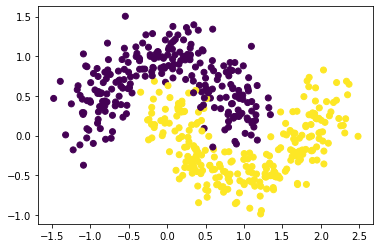

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

0.844
0.858


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVM')

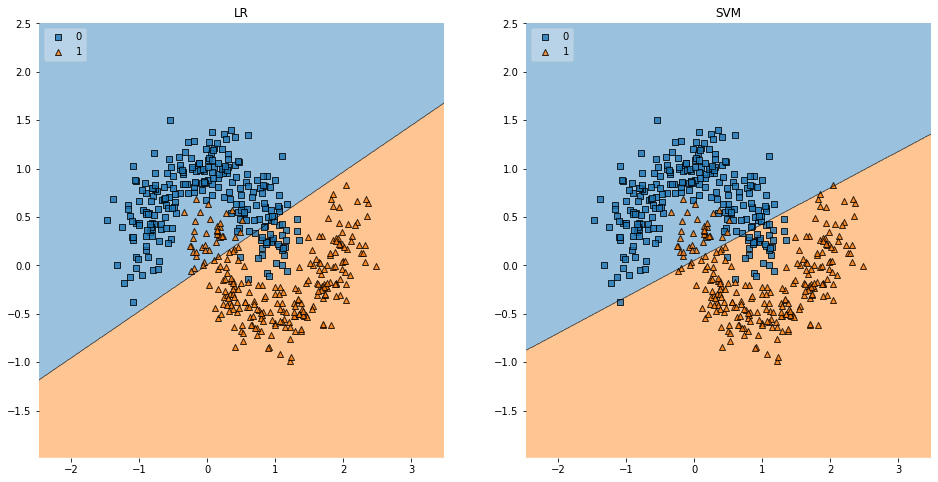

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1,2)

lr = LogisticRegression(C=0.1, penalty='l2') # add some params
svm = SVC(kernel='linear', C=0.1) # here too
lr.fit(moons_points,moons_labels)
svm.fit(moons_points,moons_labels)


### YOUR CODE 
from sklearn.metrics import accuracy_score

print(accuracy_score(lr.predict(moons_points), moons_labels))
print(accuracy_score(svm.predict(moons_points), moons_labels))

fig = plt.figure(figsize=(16,8))
ax = plt.subplot(gs[0,0])
fig =plot_decision_regions(moons_points, moons_labels, clf=lr, legend=2)
plt.title('LR')

ax = plt.subplot(gs[0,1])
fig =plot_decision_regions(moons_points, moons_labels, clf=svm, legend=2)
plt.title('SVM')



# Вывод:
Поскольку выборки линейно не разделимы алгоритмы строящие линейную границу не могут разбить данные идеально, часть данных неизбежно попадает в другой класс.

## 1.2 Kernel tirck

![keep-calm](https://github.com/G544/ml-mipt/blob/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/imgs/keep-calm.jpg?raw=1)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?\
Качество классификации улучшается на ядрах "poly" и "rbf", но уменьшается на сигмоиде
* How did decision border changed for each kernel?\
Разделяющая граница для каждого ядра перестает быть линейной

* What `degree` have you chosen and why?\
3, так как при этом значении получается самое удачное качество и за счет меньшей степени полином менее сложный.

0.906
0.974
0.648


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVM_sigm')

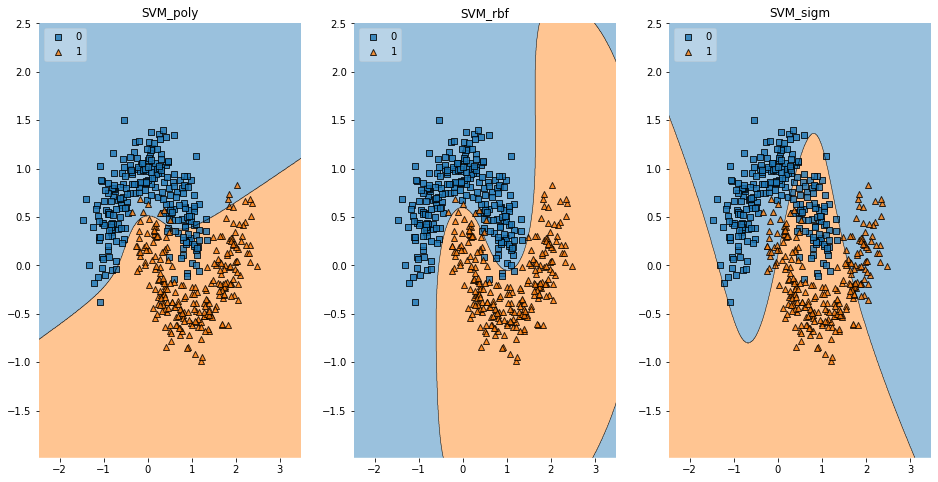

In [40]:
### YOUR CODE HERE
svm1 = SVC(kernel='poly',degree=3) # here too
svm1.fit(moons_points,moons_labels)
svm2 = SVC(kernel='rbf') # here too
svm2.fit(moons_points,moons_labels)
svm3 = SVC(kernel='sigmoid',C=1) # here too
svm3.fit(moons_points,moons_labels)

print(accuracy_score(svm1.predict(moons_points), moons_labels))
print(accuracy_score(svm2.predict(moons_points), moons_labels))
print(accuracy_score(svm3.predict(moons_points), moons_labels))



gs = gridspec.GridSpec(1,3)


fig = plt.figure(figsize=(16,8))
ax = plt.subplot(gs[0,0])
fig =plot_decision_regions(moons_points, moons_labels, clf=svm1, legend=2)
plt.title('SVM_poly')

ax = plt.subplot(gs[0,1])
fig =plot_decision_regions(moons_points, moons_labels, clf=svm2, legend=2)
plt.title('SVM_rbf')

ax = plt.subplot(gs[0,2])
fig =plot_decision_regions(moons_points, moons_labels, clf=svm3, legend=2)
plt.title('SVM_sigm')


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)\
При степени 3 и 4 результаты практически аналогичны результатам работы машины опорных векторов. Границы похожи на разделяющую плоскость с ядром "poly'. Чем выше степень, тем сложнее граница.
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.\
Степень 4 дает результат лучший, чем  'poly' . При степени 3 результат работы логистической регрессии, чуть лучше, чем при аналогичной степени у svm

0.85
0.914
0.956


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'LR_degree_poly=4')

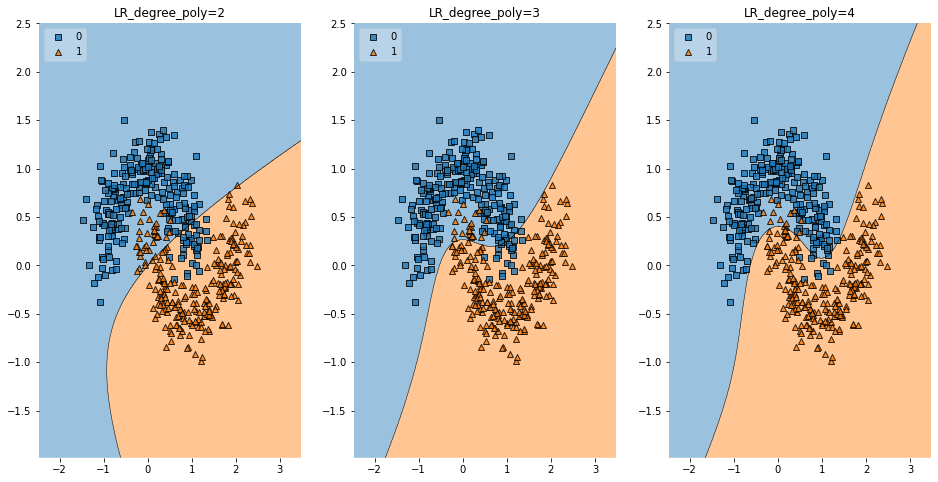

In [29]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE
from sklearn.pipeline import make_pipeline

poly_lr_2 = make_pipeline(PolynomialFeatures(2),LogisticRegression(C=0.1, penalty='l2'))
poly_lr_2.fit(moons_points,moons_labels)

poly_lr_3 = make_pipeline(PolynomialFeatures(3),LogisticRegression(C=0.1, penalty='l2'))
poly_lr_3.fit(moons_points,moons_labels)

poly_lr_5 = make_pipeline(PolynomialFeatures(5),LogisticRegression(C=0.1, penalty='l2'))
poly_lr_5.fit(moons_points,moons_labels)

print(accuracy_score(poly_lr_2.predict(moons_points), moons_labels))
print(accuracy_score(poly_lr_3.predict(moons_points), moons_labels))
print(accuracy_score(poly_lr_5.predict(moons_points), moons_labels))



gs = gridspec.GridSpec(1,3)
fig = plt.figure(figsize=(16,8))
ax = plt.subplot(gs[0,0])
fig =plot_decision_regions(moons_points, moons_labels, clf=poly_lr_2, legend=2)
plt.title('LR_degree_poly=2')

ax = plt.subplot(gs[0,1])
fig =plot_decision_regions(moons_points, moons_labels, clf=poly_lr_3, legend=2)
plt.title('LR_degree_poly=3')

ax = plt.subplot(gs[0,2])
fig =plot_decision_regions(moons_points, moons_labels, clf=poly_lr_5, legend=2)
plt.title('LR_degree_poly=4')


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

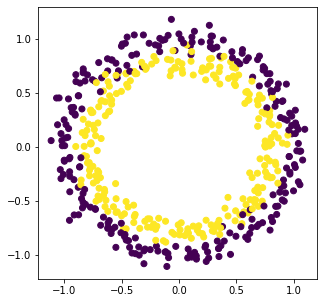

In [15]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

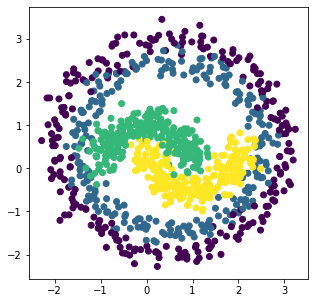

In [16]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

0.921


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVM_rbf')

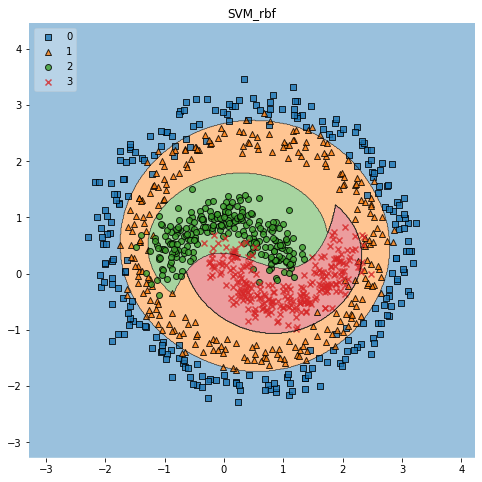

In [27]:
### YOUR CODE HERE

svm = SVC(kernel='rbf') # here too
svm.fit(points,labels)
print(accuracy_score(svm.predict(points), labels))

fig = plt.figure(figsize=(8,8))
fig =plot_decision_regions(points, labels, clf=svm, legend=2)
plt.title('SVM_rbf')


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.905


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'LR_degree_poly=2')

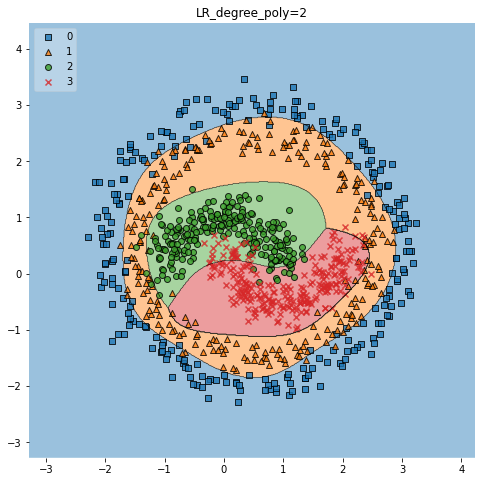

In [37]:
poly_lr_2 = make_pipeline(PolynomialFeatures(6),LogisticRegression(C=0.1, penalty='l2',multi_class='multinomial'))
poly_lr_2.fit(points,labels)


print(accuracy_score(poly_lr_2.predict(points), labels))




gs = gridspec.GridSpec(1,3)
fig = plt.figure(figsize=(8,8))
fig =plot_decision_regions(points, labels, clf=poly_lr_2, legend=2)
plt.title('LR_degree_poly=2')

# Вывод:
SVM дает хороший результат при использовании rbf ядра, аналогично хороший результатт мы можем получить и при логистической регрессии используя достаточно высокую степень для преобразования признаков(что вероятно увеличивает вычислительную сложность, так как теперь нам приходится обучаться на признаках, количество которых на порядок превышает 2 исходных признака, в то время как Svm все время обучается на 2)